# Breast Cancer Prediction – K-Nearest Neighbors (KNN) : ML (Binary Classification)

In [438]:
# Designed By : ALTAF HUSAIN DATA ANALYST

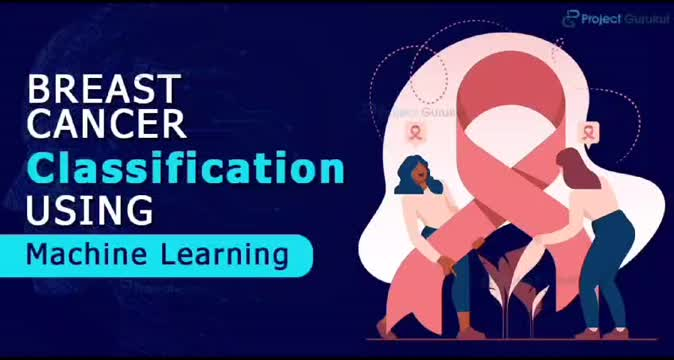

# step 1 : import modules

In [439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.datasets import load_breast_cancer,load_iris
import warnings
warnings.filterwarnings('ignore')
print("All modules loaded succesfully")

All modules loaded succesfully


# step 2 : load data

In [440]:
lbc = load_breast_cancer()

In [441]:
lbc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [442]:
df = pd.DataFrame(lbc['data'],columns=lbc['feature_names'])
df['Target'] = lbc['target']

In [443]:
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
162,19.59,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.22470,0.3643,0.09223,0
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.06576,0.1893,0.05534,...,26.30,130.70,1260.0,0.1168,0.2119,0.2318,0.14740,0.2810,0.07228,0
249,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,...,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,1
108,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,0.07039,...,28.01,206.80,2360.0,0.1701,0.6997,0.9608,0.29100,0.4055,0.09789,0
84,12.00,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,...,24.90,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924,1


In [444]:
X = lbc.data

In [445]:
y = lbc.target

In [446]:
lbc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [447]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [448]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Step 3 : EDA

In [449]:
df.shape

(569, 31)

In [450]:
X.shape[1]

30

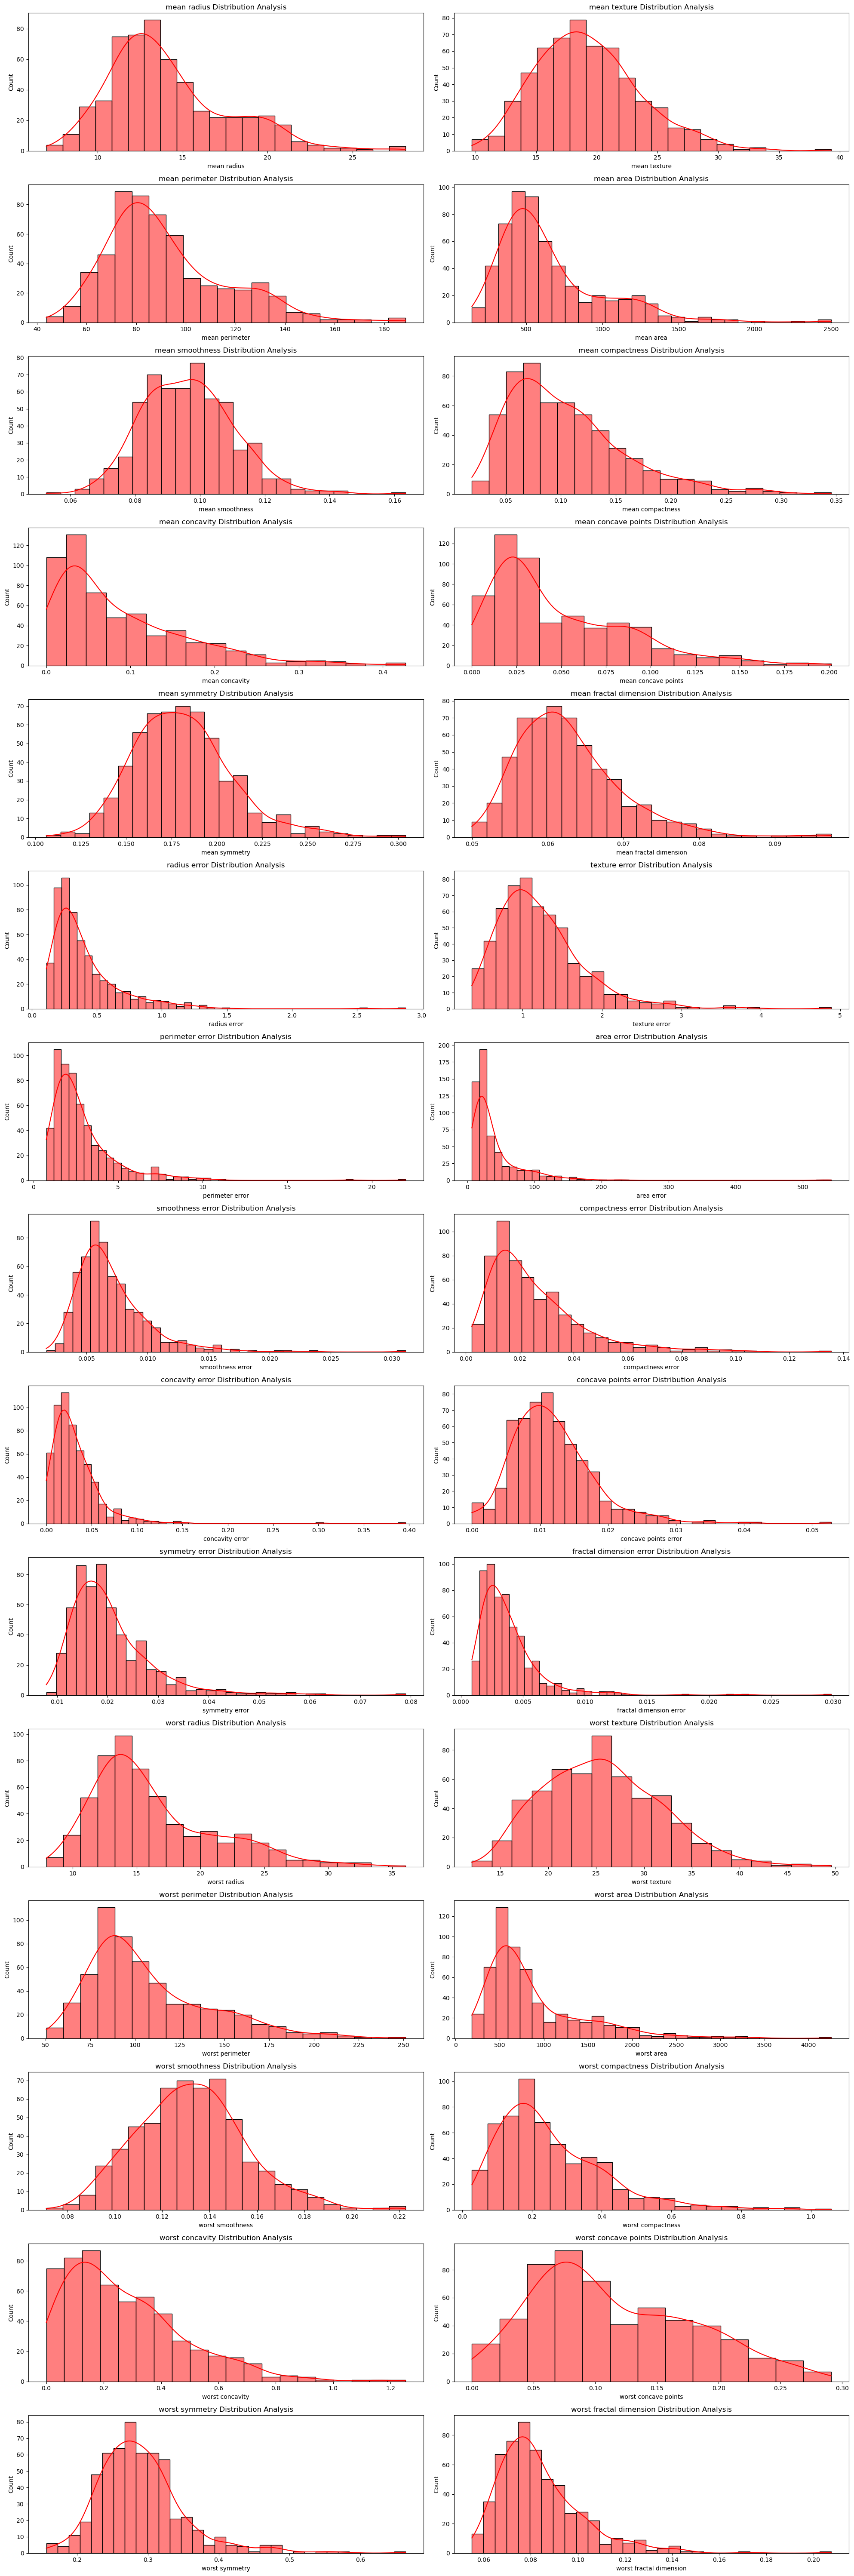

In [451]:
plt.figure(figsize=(20, 60))  
for i in range(X.shape[1]):
    plt.subplot(15,2,i+1)
    plt.title(f'{df.iloc[:, :-1].columns[i]} Distribution Analysis')
    sns.histplot(data=df, x=df.iloc[:, :-1].columns[i], kde=True, color='r')
plt.tight_layout()
plt.show()

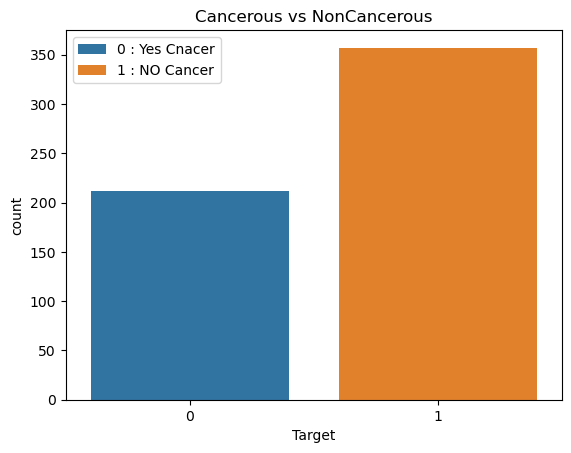

In [452]:
plt.title('Cancerous vs NonCancerous')
sns.countplot(data = df,  x = 'Target',hue = 'Target')
plt.legend(("0 : Yes Cnacer","1 : NO Cancer"))
plt.show()

<Axes: >

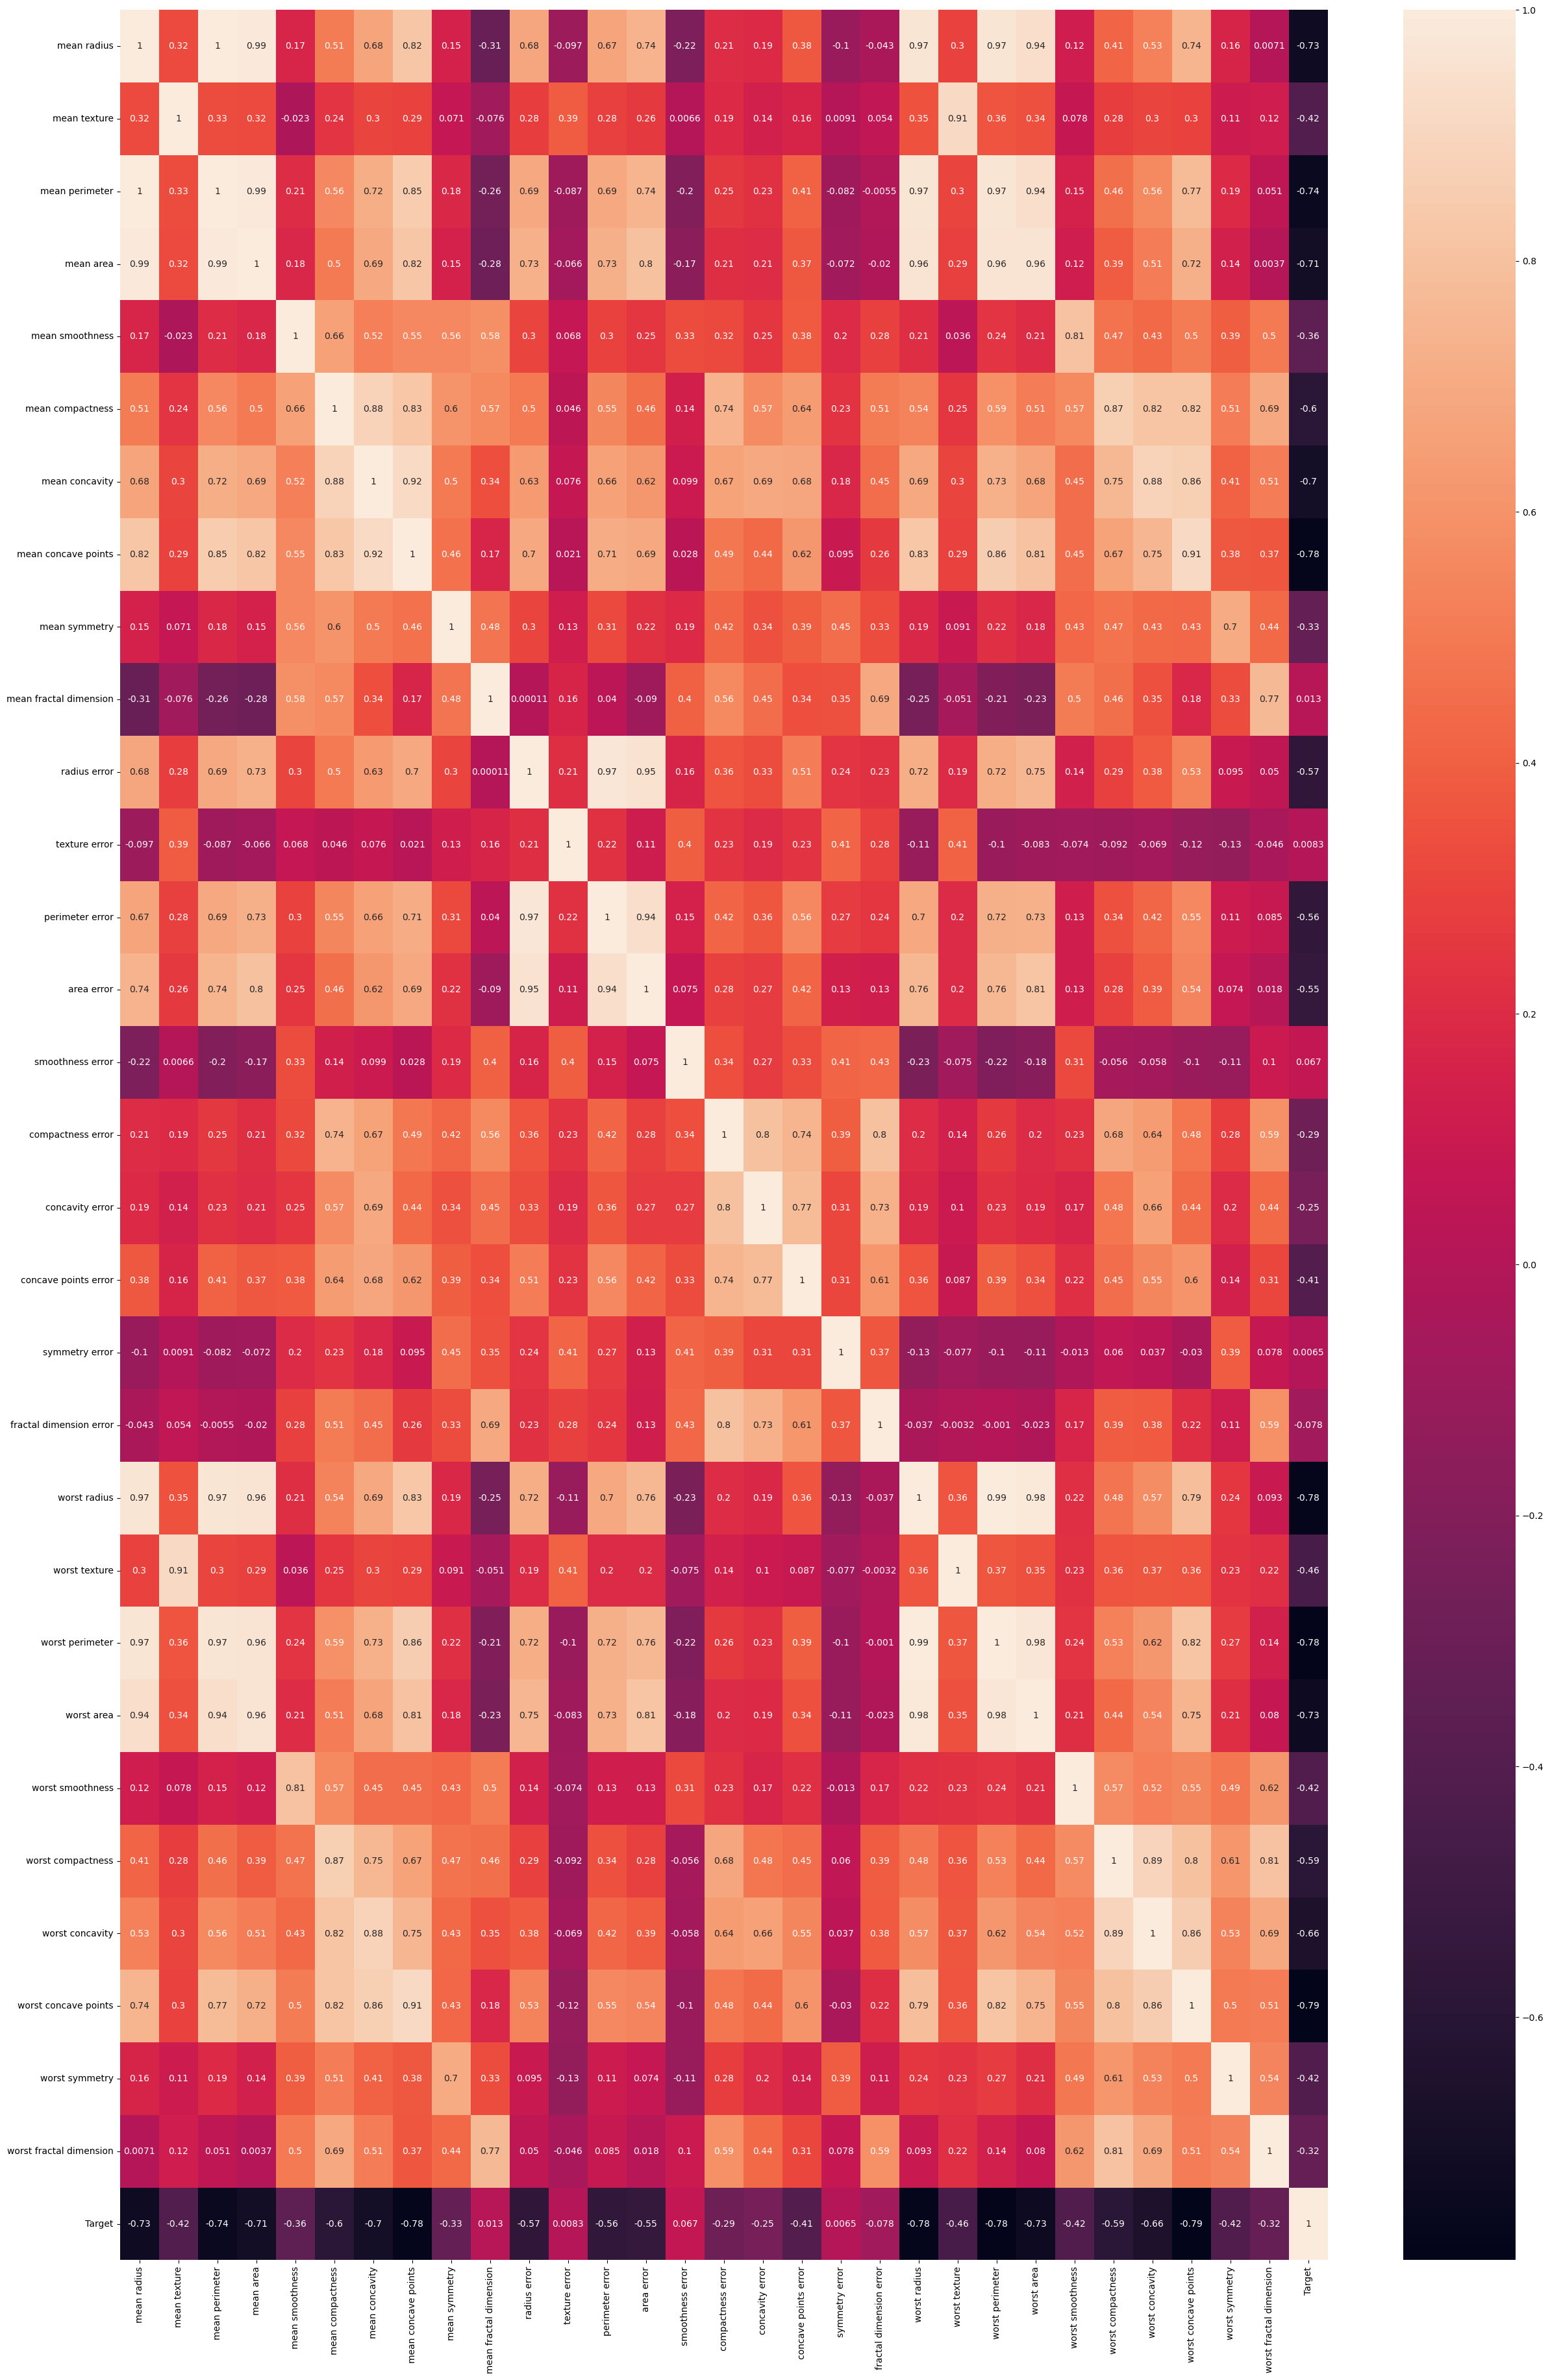

In [453]:
plt.figure(figsize=(30,45))
sns.heatmap(df.corr(),annot = True)

In [454]:
df.corr()['Target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

<Axes: >

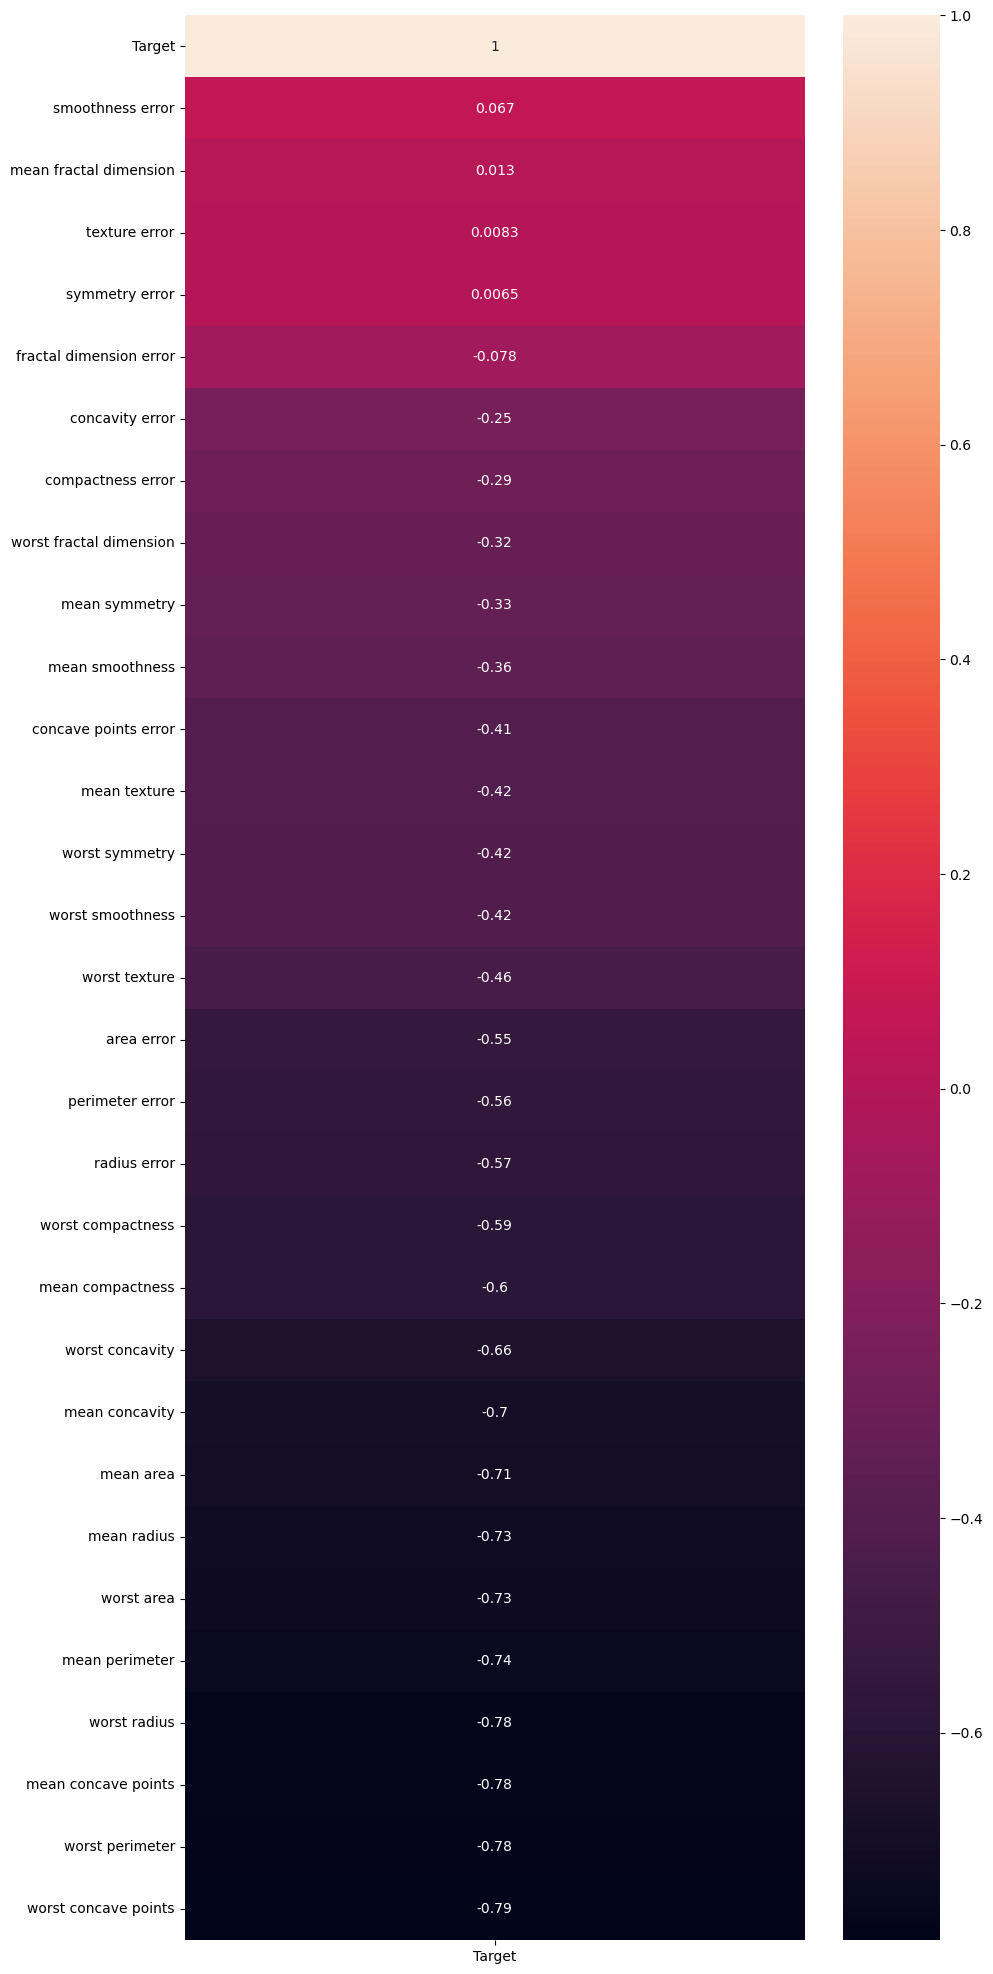

In [455]:
plt.figure(figsize=(10,25))
sns.heatmap(df.corr()[["Target"]].sort_values(by ='Target',ascending=False),annot = True)

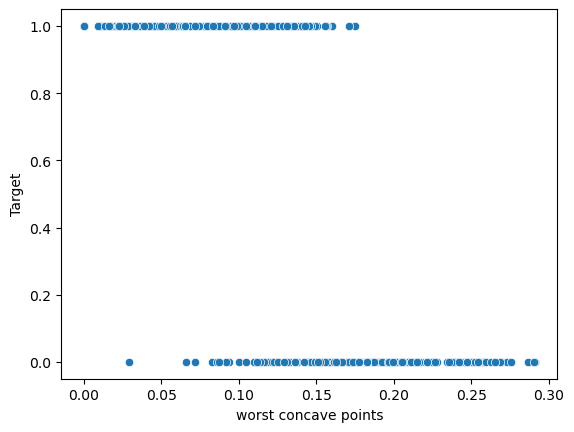

In [456]:
sns.scatterplot(data = df, x = 'worst concave points',y = 'Target' )
plt.show()

# step 4 : train-test-split

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# step 5 : model building

In [458]:
model_k = KNeighborsClassifier()

In [459]:
model_k.fit(X_train,y_train)

KNeighborsClassifier()

In [460]:
y_pred = model_k.predict(X_test)

In [461]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1])

In [462]:
y_test

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1])

In [463]:
compare_df = pd.DataFrame({'Actayp y' : y_test,'PRedictes y':y_pred})
compare_df

,Actayp y,PRedictes y
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
109,0,0
110,1,1
111,0,0
112,0,0


# Step 6 : Confusion matrix

In [464]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[31,  6],
       [ 3, 74]])

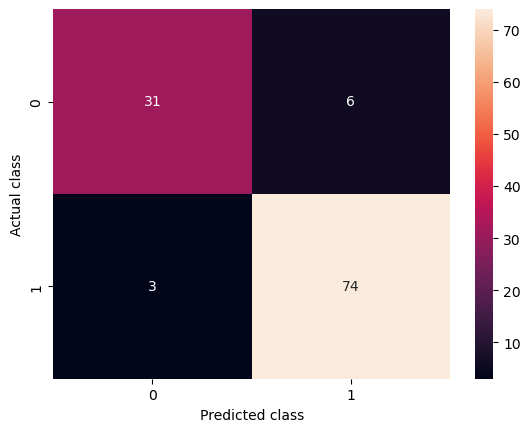

In [465]:
sns.heatmap(cm,annot= True)
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.show()

In [466]:
score = round(model_k.score(X_test,y_test)*100,2)

In [467]:
print('Model Score is :',score)

Model Score is : 92.11


In [468]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        37
           1       0.93      0.96      0.94        77

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



# Step 7 : Now finding the best K Value

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

k_dict = {'K_value': [],'Score': []}

for k in range(1,16):
  model_k = KNeighborsClassifier(n_neighbors=k)
  model_k.fit(X_train,y_train)
  y_pred =model_k.predict(X_test)
  score = round(model_k.score(X_test,y_test)*100,2)

  k_dict['K_value'].append(k)
  k_dict['Score'].append(score)

k_df = pd.DataFrame(k_dict)

In [470]:
k_df

,K_value,Score
0,1,91.23
1,2,92.98
2,3,91.23
3,4,91.23
4,5,91.23
5,6,92.98
6,7,93.86
7,8,93.86
8,9,93.86
9,10,93.86


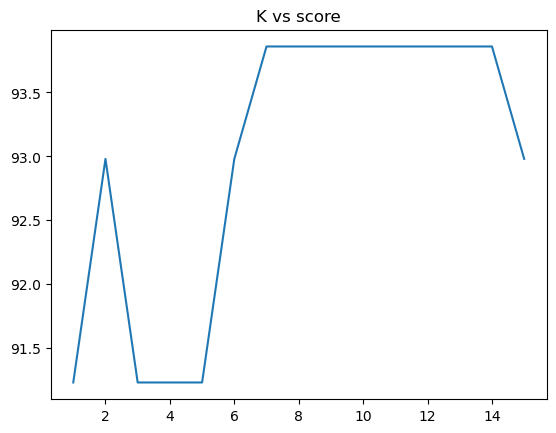

In [471]:
plt.plot(k_df['K_value'],k_df['Score'])
plt.title('K vs score')
plt.show()

In [472]:
best_k_df = k_df[k_df['Score'] == k_df['Score'].max()]
best_k = best_k_df['K_value'].values[0]
print(f"Best K value is : {best_k}")

Best K value is : 7


# Step 8 : Model building after best k

In [473]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

# Step 9 : Confusion matirx

In [474]:
cm = confusion_matrix(y_test, y_pred_final)
cm

array([[39,  4],
       [ 3, 68]])

<Axes: >

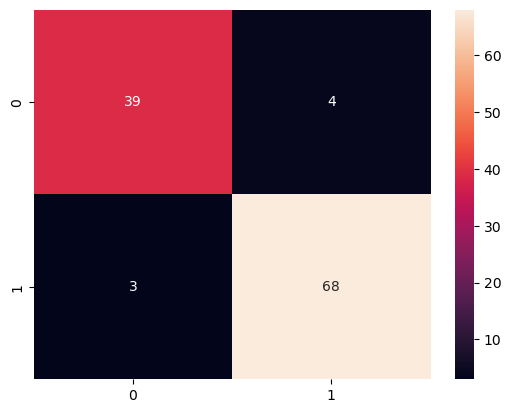

In [475]:
sns.heatmap(cm,annot =True)

In [476]:
score = round(final_knn.score(X_test,y_test)*100,2)
score

93.86

In [477]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



# Step 10 : Prediction cancer vs non cancer

In [479]:
sample_data = pd.DataFrame(X).sample()
ans = final_knn.predict(sample_data)[0]
probability = round(final_knn.predict_proba(sample_data).max() * 100, 2)

if ans == 0:
    print(f"Cancer with chances of {probability}%")
else:
    print(f"No Cancer with chances of {probability}%")

No Cancer with chances of 85.71%


In [ ]:
# Designed By : ALTAF HUSAIN DATA ANALYST